<div style="background-color: purple; padding: 10px;">
<span style="font-size: 24px; font-weight: bold; color: white;">Car Price Prediction</span>
</div>

In [629]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [631]:
from bs4 import BeautifulSoup
import requests

### HTTP Request

In [632]:
website = 'https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D=&list_price_max=&maximum_distance=20&zip='


In [633]:
response = requests.get(website)

In [634]:
response.status_code

200

### Soup Object

In [635]:
soup = BeautifulSoup(response.content, 'html.parser')

In [636]:
results = soup.find_all('div', {'class' : 'vehicle-card'})

In [637]:
len(results)

21

### Target necessary data

#### - Name
#### - Mileage
#### - Dealer Name
#### - Rating
#### - Rating Count
#### - Price

#### Name

In [638]:
results[0].find('h2').get_text()

'2022 Mercedes-Benz EQB 350 Base 4MATIC'

#### Mileage

In [9]:
results[0].find('div', {'class':'mileage'}).get_text()

'4,930 mi.'

#### Dealer Name

In [10]:
results[0].find('div', {'class':'dealer-name'}).get_text().strip()


'Mercedes-Benz of Foothill Ranch'

#### Rating

In [11]:
results[0].find('span', {'class':'sds-rating__count'}).get_text()

'4.7'

#### Rating Count

In [12]:
results[0].find('span', {'class':'sds-rating__link'}).get_text()


'(668 reviews)'

#### Price

In [13]:
results[0].find('span', {'class':'primary-price'}).get_text()


'$47,999'

#### Single Page

In [639]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for result in results:
    
    # name
    try:
        name.append(result.find('h2').get_text()) 
    except:
        name.append('n/a')
    
    # mileage
    try:
        mileage.append(result.find('div', {'class':'mileage'}).get_text())
    except:
        mileage.append('n/a')
    
    # dealer_name
    try:
        dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('n/a')
        
    # rating
    try:
        rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
    except:
        rating.append('n/a')
    
    # review_count
    try:
        review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
    except:
        review_count.append('n/a')
    
    #price 
    try:
        price.append(result.find('span', {'class':'primary-price'}).get_text())
    except:
        price.append('n/a')

#### Pandas Dataframe

In [640]:
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer_Name':dealer_name,
                                'Rating': rating, 'Review_Count': review_count, 'Price': price})

In [641]:
car_dealer

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,"4,930 mi.",Mercedes-Benz of Foothill Ranch,4.7,(669 reviews),"$47,999"
1,2021 Mercedes-Benz GLS 450 4MATIC,"24,599 mi.",Mercedes-Benz of Rochester,4.7,(153 reviews),"$68,995"
2,2022 Mercedes-Benz AMG G 63 4MATIC,"8,095 mi.",Benzel-Busch Motor Car,4.5,"(5,334 reviews)","$206,551"
3,2023 Mercedes-Benz AMG GLE 53 Base,"1,056 mi.",D-Patrick Motoplex,4.7,(373 reviews),"$94,595"
4,2018 Mercedes-Benz GLC 300,"59,985 mi.",Loeber Motors Inc.,4.2,(542 reviews),"$26,998"
5,2020 Mercedes-Benz S-Class S 450,"43,514 mi.",Mercedes-Benz of Fayetteville,4.9,"(1,270 reviews)","$56,500"
6,2022 Mercedes-Benz AMG SL 55 Base,860 mi.,Mercedes-Benz of North Palm Beach,2.9,(51 reviews),"$136,000"
7,2022 Mercedes-Benz S-Class S 500 4MATIC,"3,895 mi.","Smith Motor Sales of Haverhill, Inc.",4.9,"(1,789 reviews)","$106,988"
8,2020 Mercedes-Benz GLE 450 AWD 4MATIC,"43,482 mi.",Benzel-Busch Motor Car,4.5,"(5,334 reviews)","$58,999"
9,2020 Mercedes-Benz GLA 250 Base 4MATIC,"32,948 mi.",Mercedes-Benz of Omaha,4.3,(420 reviews),"$30,500"


### Pagination

In [642]:
name = []
mileage = []
dealer_name = []
rating = []
review_count = []
price = []

for i in range (1,150):
    
    # website in variable
    website = 'https://www.cars.com/shopping/results/?page='+ str(i) +'&page_size=20&dealer_id=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=20&mileage_max=&sort=best_match_desc&stock_type=cpo&year_max=&year_min=&zip=' 
    
    # request to website
    response = requests.get(website)
    
    # soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # results
    results = soup.find_all('div', {'class' : 'vehicle-card'})
    
    # loop through results
    for result in results:
    
        # name
        try:
            name.append(result.find('h2').get_text()) 
        except:
            name.append('n/a')

        # mileage
        try:
            mileage.append(result.find('div', {'class':'mileage'}).get_text())
        except:
            mileage.append('n/a')

        # dealer_name
        try:
            dealer_name.append(result.find('div', {'class':'dealer-name'}).get_text().strip())
        except:
            dealer_name.append('n/a')

        # rating
        try:
            rating.append(result.find('span', {'class':'sds-rating__count'}).get_text())
        except:
            rating.append('n/a')

        # review_count
        try:
            review_count.append(result.find('span', {'class':'sds-rating__link'}).get_text())
        except:
            review_count.append('n/a')

        #price 
        try:
            price.append(result.find('span', {'class':'primary-price'}).get_text())
        except:
            price.append('n/a')

In [643]:
car_dealer = pd.DataFrame({'Name': name, 'Mileage':mileage, 'Dealer_Name':dealer_name,
                                'Rating': rating, 'Review_Count': review_count, 'Price': price})

In [644]:
car_dealer

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,"4,930 mi.",Mercedes-Benz of Foothill Ranch,4.7,(669 reviews),"$47,999"
1,2018 Mercedes-Benz GLC 300,"59,985 mi.",Loeber Motors Inc.,4.2,(542 reviews),"$26,998"
2,2022 Mercedes-Benz GLB 250 Base 4MATIC,"15,899 mi.",Mercedes-Benz of Catonsville,4.3,(494 reviews),"$39,600"
3,2022 Mercedes-Benz AMG SL 55 Base,860 mi.,Mercedes-Benz of North Palm Beach,2.9,(51 reviews),"$136,000"
4,2022 Mercedes-Benz AMG GLB 35 Base,"22,815 mi.",Mercedes-Benz of Chantilly,4.7,(976 reviews),"$48,500"
...,...,...,...,...,...,...
3026,2020 Mercedes-Benz GLE 350 Base 4MATIC,"7,754 mi.",Mercedes-Benz of Union,4.6,(920 reviews),"$55,995"
3027,2022 Mercedes-Benz AMG GLA 35 Base,"4,441 mi.",Aristocrat Motors,4.7,"(1,375 reviews)","$57,977"
3028,2020 Mercedes-Benz GLE 350 Base 4MATIC,"36,682 mi.",Mercedes-Benz of Nanuet,4.7,(268 reviews),"$48,192"
3029,2021 Mercedes-Benz GLC 300 Base 4MATIC,"27,202 mi.",Mercedes-Benz of Jacksonville,4.5,(84 reviews),"$39,991"


In [648]:
# car_dealer.to_excel(r"D:\MASAI SCHOOL\CAPSTONE_PROJECT\CAR.COM_PROJECT\EXCEL_FILE\CAR_TAB_RAW.xlsx", index=False)

In [647]:
# car_dealer.to_csv(r"D:\MASAI SCHOOL\CAPSTONE_PROJECT\CAR.COM_PROJECT\EXCEL_FILE\CAR_TAB_RAW_CSV.csv", index=False)


### Data Cleaning

In [649]:
df=car_dealer.copy()

In [650]:
df.sample()

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price
2807,2023 Mercedes-Benz CLA 250 Base 4MATIC,"5,165 mi.",Mercedes-Benz of Westmont,4.6,"(1,132 reviews)","$46,277"


### Dealing with Noise and Null Value

In [651]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep="\n")
    

Name
['2014 Mercedes-Benz SLK-Class SLK 250' '2015 Mercedes-Benz S-Class S 550'
 '2015 Mercedes-Benz S-Class S 63 AMG'
 '2015 Mercedes-Benz SL-Class SL 550'
 '2016 Mercedes-Benz CLA-Class CLA 250'
 '2016 Mercedes-Benz CLS-Class CLS 400'
 '2016 Mercedes-Benz CLS-Class CLS 400 4MATIC'
 '2016 Mercedes-Benz E-Class E 350'
 '2016 Mercedes-Benz E-Class E 350 4MATIC'
 '2016 Mercedes-Benz G-Class G 550'
 '2016 Mercedes-Benz GL-Class GL 450 4MATIC'
 '2016 Mercedes-Benz GLC-Class GLC 300'
 '2016 Mercedes-Benz GLE-Class GLE 350 4MATIC'
 '2016 Mercedes-Benz Maybach S S 600' '2016 Mercedes-Benz S-Class S 550'
 '2016 Mercedes-Benz S-Class S 550 4MATIC'
 '2016 Mercedes-Benz SL-Class SL 550'
 '2017 Mercedes-Benz AMG C 43 Base 4MATIC'
 '2017 Mercedes-Benz AMG E 43 Base 4MATIC'
 '2017 Mercedes-Benz AMG G 63 Base'
 '2017 Mercedes-Benz AMG GLC 43 4MATIC Coupe'
 '2017 Mercedes-Benz AMG GLE 43 Base 4MATIC'
 '2017 Mercedes-Benz AMG GLE 43 Coupe 4MATIC'
 '2017 Mercedes-Benz AMG GLE 63 S-Model 4MATIC'
 '2017 M

In [652]:

df.isnull().sum()

Name            0
Mileage         0
Dealer_Name     0
Rating          0
Review_Count    0
Price           0
dtype: int64

In [653]:
df.dtypes

Name            object
Mileage         object
Dealer_Name     object
Rating          object
Review_Count    object
Price           object
dtype: object

In [655]:
df[df["Rating"]=="n/a"]


,Name,Mileage,Dealer_Name,Rating,Review_Count,Price
34,2022 Mercedes-Benz AMG GLA 35 Base,"17,496 mi.",Mercedes-Benz of Milwaukee North,n/a,(307 reviews),"$45,985"
51,2021 Mercedes-Benz GLE 450 AWD 4MATIC,"33,300 mi.",Mercedes-Benz of Milwaukee North,n/a,(307 reviews),"$61,943"
55,2021 Mercedes-Benz S-Class S 580 4MATIC,"19,704 mi.",Santa Barbara Auto Group,n/a,(38 reviews),"$89,900"
63,2020 Mercedes-Benz AMG GT 53 Base,"14,797 mi.",Mercedes-Benz of Lafayette,n/a,(150 reviews),"$80,488"
71,2020 Mercedes-Benz E-Class E 450,"34,049 mi.",Santa Barbara Auto Group,n/a,(38 reviews),"$41,900"
...,...,...,...,...,...,...
2990,2022 Mercedes-Benz S-Class,"1,274 mi.",MERCEDES-BENZ OF ST. GEORGE,n/a,(1 review),"$120,000"
2994,2020 Mercedes-Benz C-Class C 300,"27,182 mi.",Mercedes-Benz of Lafayette,n/a,(150 reviews),"$34,605"
2997,2020 Mercedes-Benz GLE 350 Base,"31,471 mi.",Mercedes-Benz of Memphis,n/a,(17 reviews),"$53,999"
3004,2020 Mercedes-Benz E-Class E 350 4MATIC,"28,631 mi.",Mercedes-Benz of Indianapolis,n/a,(80 reviews),"$43,720"


In [656]:
# Droping the null value
df = df.drop(df[df["Rating"] == "n/a"].index)


In [657]:
df

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,"4,930 mi.",Mercedes-Benz of Foothill Ranch,4.7,(669 reviews),"$47,999"
1,2018 Mercedes-Benz GLC 300,"59,985 mi.",Loeber Motors Inc.,4.2,(542 reviews),"$26,998"
2,2022 Mercedes-Benz GLB 250 Base 4MATIC,"15,899 mi.",Mercedes-Benz of Catonsville,4.3,(494 reviews),"$39,600"
3,2022 Mercedes-Benz AMG SL 55 Base,860 mi.,Mercedes-Benz of North Palm Beach,2.9,(51 reviews),"$136,000"
4,2022 Mercedes-Benz AMG GLB 35 Base,"22,815 mi.",Mercedes-Benz of Chantilly,4.7,(976 reviews),"$48,500"
...,...,...,...,...,...,...
3026,2020 Mercedes-Benz GLE 350 Base 4MATIC,"7,754 mi.",Mercedes-Benz of Union,4.6,(920 reviews),"$55,995"
3027,2022 Mercedes-Benz AMG GLA 35 Base,"4,441 mi.",Aristocrat Motors,4.7,"(1,375 reviews)","$57,977"
3028,2020 Mercedes-Benz GLE 350 Base 4MATIC,"36,682 mi.",Mercedes-Benz of Nanuet,4.7,(268 reviews),"$48,192"
3029,2021 Mercedes-Benz GLC 300 Base 4MATIC,"27,202 mi.",Mercedes-Benz of Jacksonville,4.5,(84 reviews),"$39,991"


In [658]:
# Convert the "Rating" column to float
df.Rating= df.Rating.astype("float64")


In [659]:
#Review Count
df['Review_Count'] = df['Review_Count'].apply(lambda x: x.strip('reviews)').strip('('))

In [660]:
df["Review_Count"] = df["Review_Count"].str.replace(",", "")

In [661]:
# Convert the "Review_Count" column to integer
df["Review_Count"] = df["Review_Count"].astype(int)

In [662]:
df.dtypes

Name             object
Mileage          object
Dealer_Name      object
Rating          float64
Review_Count      int32
Price            object
dtype: object

In [663]:
# Remove dollar sign from "Price" column
df["Price"] = df["Price"].str.replace("$", "")


In [664]:
df["Price"] = df["Price"].str.replace(",", "")

In [665]:
df["Price"] = df["Price"].astype("float64")

In [666]:
# Remove non-numeric characters from "Mileage" column
df["Mileage"] = df["Mileage"].str.replace(",", "").str.replace("mi.", "")

In [667]:
df["Mileage"] = df["Mileage"].astype("float64")

In [668]:
df.dtypes

Name             object
Mileage         float64
Dealer_Name      object
Rating          float64
Review_Count      int32
Price           float64
dtype: object

In [669]:
df


,Name,Mileage,Dealer_Name,Rating,Review_Count,Price
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,4930.0,Mercedes-Benz of Foothill Ranch,4.7,669,47999.0
1,2018 Mercedes-Benz GLC 300,59985.0,Loeber Motors Inc.,4.2,542,26998.0
2,2022 Mercedes-Benz GLB 250 Base 4MATIC,15899.0,Mercedes-Benz of Catonsville,4.3,494,39600.0
3,2022 Mercedes-Benz AMG SL 55 Base,860.0,Mercedes-Benz of North Palm Beach,2.9,51,136000.0
4,2022 Mercedes-Benz AMG GLB 35 Base,22815.0,Mercedes-Benz of Chantilly,4.7,976,48500.0
...,...,...,...,...,...,...
3026,2020 Mercedes-Benz GLE 350 Base 4MATIC,7754.0,Mercedes-Benz of Union,4.6,920,55995.0
3027,2022 Mercedes-Benz AMG GLA 35 Base,4441.0,Aristocrat Motors,4.7,1375,57977.0
3028,2020 Mercedes-Benz GLE 350 Base 4MATIC,36682.0,Mercedes-Benz of Nanuet,4.7,268,48192.0
3029,2021 Mercedes-Benz GLC 300 Base 4MATIC,27202.0,Mercedes-Benz of Jacksonville,4.5,84,39991.0


### Feature Extraction

In [670]:
# Extract the year from the "Name" column
df['Year'] = df['Name'].str.extract(r'(\d{4})')

In [671]:
df['Year'].isnull().sum()

0

In [554]:
# df['Year']=df['Year'].astype(int)


In [672]:
df.dtypes

Name             object
Mileage         float64
Dealer_Name      object
Rating          float64
Review_Count      int32
Price           float64
Year             object
dtype: object

In [676]:
df

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price,Year
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,4930.0,Mercedes-Benz of Foothill Ranch,4.7,669,47999.0,2022
1,2018 Mercedes-Benz GLC 300,59985.0,Loeber Motors Inc.,4.2,542,26998.0,2018
2,2022 Mercedes-Benz GLB 250 Base 4MATIC,15899.0,Mercedes-Benz of Catonsville,4.3,494,39600.0,2022
3,2022 Mercedes-Benz AMG SL 55 Base,860.0,Mercedes-Benz of North Palm Beach,2.9,51,136000.0,2022
4,2022 Mercedes-Benz AMG GLB 35 Base,22815.0,Mercedes-Benz of Chantilly,4.7,976,48500.0,2022
...,...,...,...,...,...,...,...
3026,2020 Mercedes-Benz GLE 350 Base 4MATIC,7754.0,Mercedes-Benz of Union,4.6,920,55995.0,2020
3027,2022 Mercedes-Benz AMG GLA 35 Base,4441.0,Aristocrat Motors,4.7,1375,57977.0,2022
3028,2020 Mercedes-Benz GLE 350 Base 4MATIC,36682.0,Mercedes-Benz of Nanuet,4.7,268,48192.0,2020
3029,2021 Mercedes-Benz GLC 300 Base 4MATIC,27202.0,Mercedes-Benz of Jacksonville,4.5,84,39991.0,2021


In [557]:
# df['Model'] = df['Name'].str.extract(r'\d{4}\s(.+?)\s')

In [558]:
# df['Model']

In [559]:
# df['Variant'] = df['Name'].str.split().str[2:]

In [560]:
# df['Variant']

In [674]:
# # Save DataFrame as Excel file with specified path

# df.to_excel(r"D:\MASAI SCHOOL\CAPSTONE_PROJECT\CAR.COM_PROJECT\EXCEL_FILE\CAR_TAB_FINAL.xlsx", index=False)


In [675]:
# df.to_csv(r"D:\MASAI SCHOOL\CAPSTONE_PROJECT\CAR.COM_PROJECT\EXCEL_FILE\CAR_TAB_FINAL_CSV.csv", index=False)


### Statical Summary

In [561]:

df.describe()

,Mileage,Rating,Review_Count,Price
count,1853.000000,1853.000000,1853.000000,1853.000000
mean,22075.590394,4.514841,1301.166757,65745.948732
std,16785.553397,0.441112,1201.827868,34908.810842
min,100.000000,2.300000,25.000000,22239.000000
25%,7536.000000,4.400000,435.000000,42772.000000
50%,19215.000000,4.700000,990.000000,55881.000000
75%,33449.000000,4.800000,1794.000000,74888.000000
max,85646.000000,5.000000,6757.000000,259999.000000


### Univariate Analysis

In [562]:
df["Mileage(mi.)"]=df["Mileage"]

In [563]:
df["Price($)"]=df["Price"]

In [1]:
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Mileage(mi.)', bins=10, kde=True)
plt.xlabel('Mileage(mi.)')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage(mi.)')

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'Distribution of Price($)')

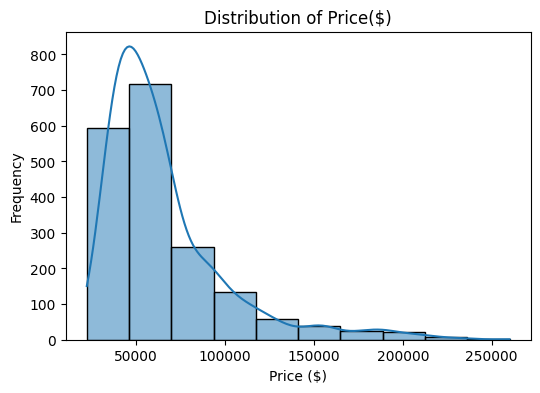

In [565]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Price($)', bins=10, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Price($)')

### Bivariate Analysis

C:\Users\pranj\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


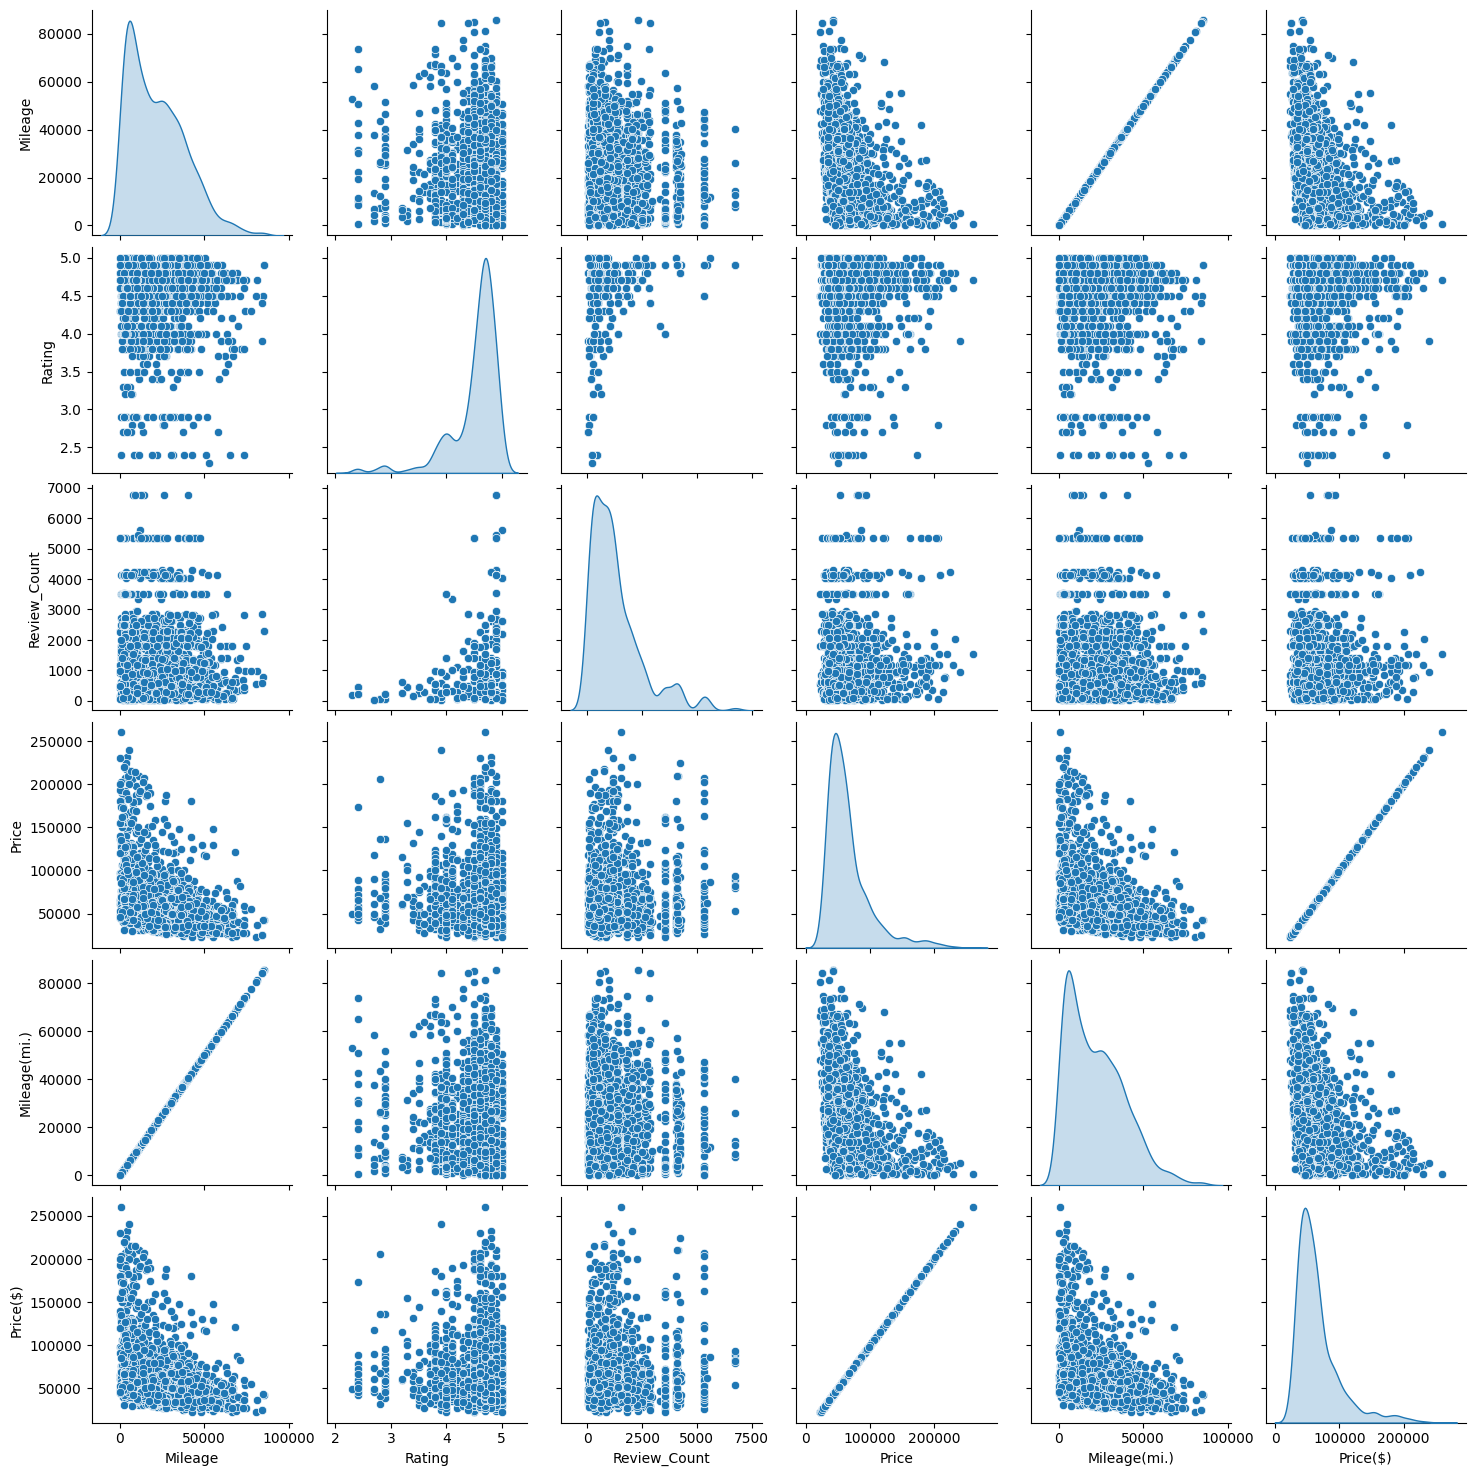

In [566]:
sns.pairplot(df,diag_kind="kde")

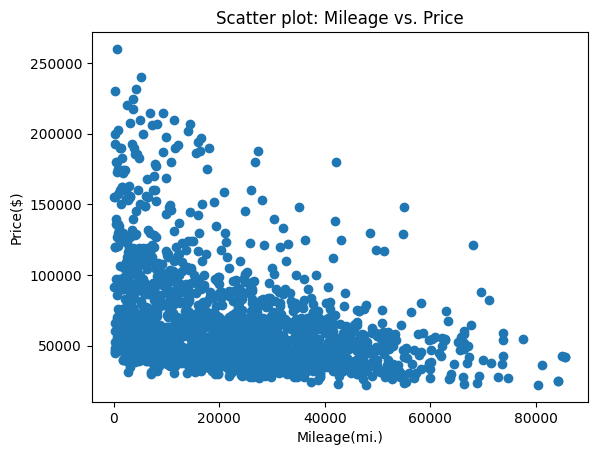

In [567]:
# Scatter plot: Mileage vs. Price
plt.scatter(df['Mileage(mi.)'], df['Price($)'])
plt.xlabel('Mileage(mi.)')
plt.ylabel('Price($)')
plt.title('Scatter plot: Mileage vs. Price')
plt.show()

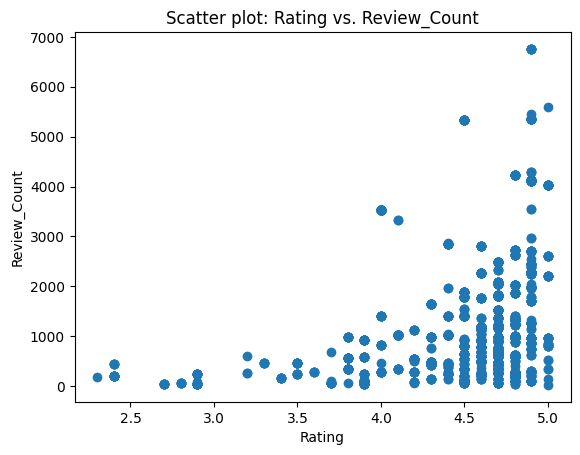

In [568]:
# Scatter plot: Rating vs. Review_Count
plt.scatter(df['Rating'], df['Review_Count'])
plt.xlabel('Rating')
plt.ylabel('Review_Count')
plt.title('Scatter plot: Rating vs. Review_Count')
plt.show()

### Multivariate Analysis

In [569]:
col=['Year', 'Price', 'Mileage']

In [570]:
corr_ = df[col].corr()

<Axes: >

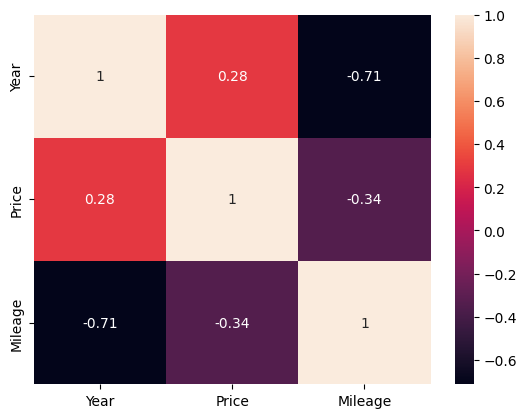

In [571]:
sns.heatmap(corr_, annot=True)

### INSIGTS

In [572]:

# Top 5 most expensive cars
expensive_cars = df.nlargest(5, 'Price($)')
print("Top 5 Most Expensive Cars:")
print(expensive_cars[['Name', 'Price($)']])


Top 5 Most Expensive Cars:
                                              Name  Price($)
149   2023 Mercedes-Benz Maybach S 680 Base 4MATIC  259999.0
333        2022 Mercedes-Benz Maybach S 580 4MATIC  240000.0
172             2023 Mercedes-Benz AMG G 63 4MATIC  231883.0
1800            2022 Mercedes-Benz AMG G 63 4MATIC  229999.0
741             2022 Mercedes-Benz AMG G 63 4MATIC  224900.0


([0, 1, 2, 3],
 [Text(0, 0, '2023 Mercedes-Benz Maybach S 680 Base 4MATIC'),
  Text(1, 0, '2022 Mercedes-Benz Maybach S 580 4MATIC'),
  Text(2, 0, '2023 Mercedes-Benz AMG G 63 4MATIC'),
  Text(3, 0, '2022 Mercedes-Benz AMG G 63 4MATIC')])

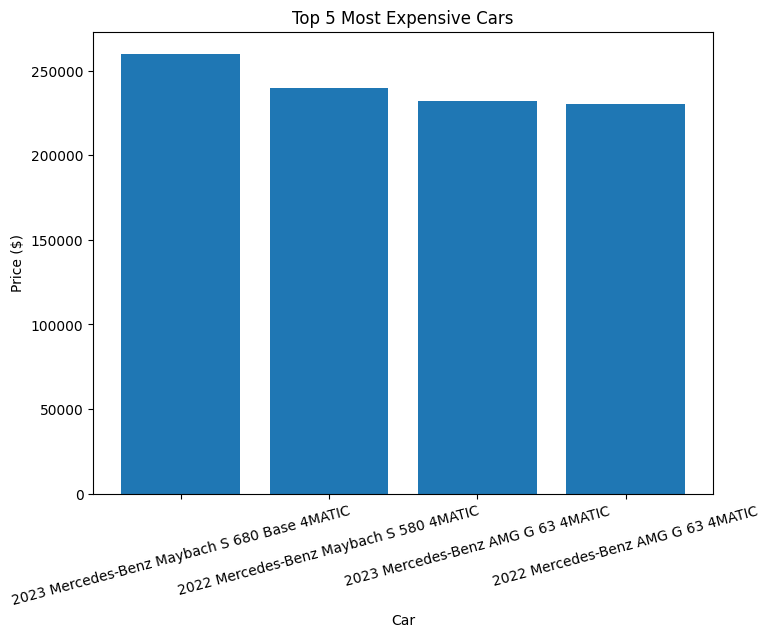

In [573]:
expensive_cars = df.nlargest(5, 'Price($)')
car_names = expensive_cars['Name']
prices = expensive_cars['Price($)']

plt.figure(figsize=(8, 6))
plt.bar(car_names, prices)
plt.xlabel('Car')
plt.ylabel('Price ($)')
plt.title('Top 5 Most Expensive Cars')
plt.xticks(rotation=15)

In [574]:
# 5 most rated cars
rated_cars = df.nlargest(5, 'Review_Count')
print("\n5 Most Rated Cars:")
print(rated_cars[['Name', 'Rating', 'Review_Count']])


5 Most Rated Cars:
                                         Name  Rating  Review_Count
782          2019 Mercedes-Benz S-Class S 560     4.9          6757
794        2021 Mercedes-Benz AMG GLE 53 Base     4.9          6757
1272   2020 Mercedes-Benz GLS 580 Base 4MATIC     4.9          6757
1275  2022 Mercedes-Benz S-Class S 500 4MATIC     4.9          6757
1707        2022 Mercedes-Benz GLS 450 4MATIC     4.9          6757


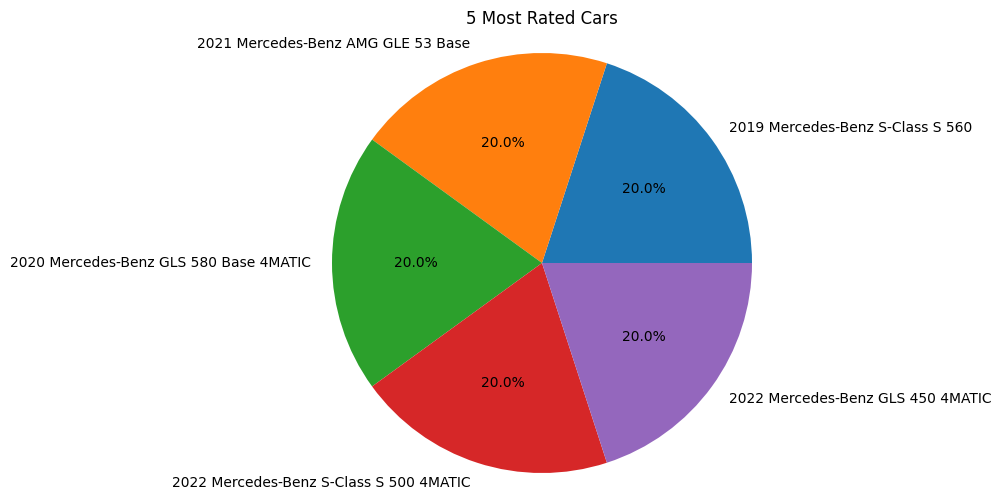

In [575]:

rated_cars = df.nlargest(5, 'Review_Count')
car_names = rated_cars['Name']
ratings = rated_cars['Rating']
review_counts = rated_cars['Review_Count']

plt.figure(figsize=(8, 6))
plt.pie(review_counts, labels=car_names, autopct='%1.1f%%')
plt.title('5 Most Rated Cars')
plt.axis('equal')
plt.show()


In [576]:
# Top 5 high mileage cars
high_mileage_cars = df.nlargest(5, 'Mileage(mi.)')
print("\nTop 5 High Mileage Cars:")
print(high_mileage_cars[['Name', 'Mileage(mi.)']])


Top 5 High Mileage Cars:
                                            Name  Mileage(mi.)
40       2018 Mercedes-Benz S-Class S 450 4MATIC       85646.0
43       2018 Mercedes-Benz S-Class S 450 4MATIC       85646.0
104   2017 Mercedes-Benz AMG GLE 43 Coupe 4MATIC       84980.0
1931      2018 Mercedes-Benz GLC 300 Base 4MATIC       84326.0
421       2017 Mercedes-Benz E-Class E 300 Sport       84269.0


In [577]:
df

,Name,Mileage,Dealer_Name,Rating,Review_Count,Price,Year,Mileage(mi.),Price($)
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,4930.0,Mercedes-Benz of Foothill Ranch,4.7,668,47999.0,2022,4930.0,47999.0
1,2022 Mercedes-Benz AMG G 63 4MATIC,8095.0,Benzel-Busch Motor Car,4.5,5334,206551.0,2022,8095.0,206551.0
2,2023 Mercedes-Benz AMG GLE 53 Base,1056.0,D-Patrick Motoplex,4.7,373,94595.0,2023,1056.0,94595.0
3,2022 Mercedes-Benz AMG GLB 35 Base,22815.0,Mercedes-Benz of Chantilly,4.7,976,48500.0,2022,22815.0,48500.0
4,2020 Mercedes-Benz GLC 350e Base 4MATIC,35012.0,Fletcher Jones Motorcars of Fremont,4.7,1221,37981.0,2020,35012.0,37981.0
...,...,...,...,...,...,...,...,...,...
2025,2022 Mercedes-Benz S-Class S 580 4MATIC,9503.0,Autohaus on Edens,4.7,2494,98324.0,2022,9503.0,98324.0
2026,2019 Mercedes-Benz E-Class E 300,53815.0,Morrie's Mercedes Benz of St. Paul,4.8,278,35999.0,2019,53815.0,35999.0
2028,2021 Mercedes-Benz GLS 450 4MATIC,30259.0,Mercedes-Benz of Catonsville,4.3,494,68000.0,2021,30259.0,68000.0
2029,2019 Mercedes-Benz E-Class E 300 4MATIC,49951.0,Mercedes-Benz of Arcadia,4.8,1229,35995.0,2019,49951.0,35995.0


In [578]:
df.drop(["Mileage", "Price"], axis=1, inplace=True)

### OUTLIER ANALYSIS

In [579]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes=="O":
        cat.append(i)
    else:
        num.append(i)

In [580]:
cat

['Name', 'Dealer_Name', 'Year']

In [581]:
num

['Rating', 'Review_Count', 'Mileage(mi.)', 'Price($)']

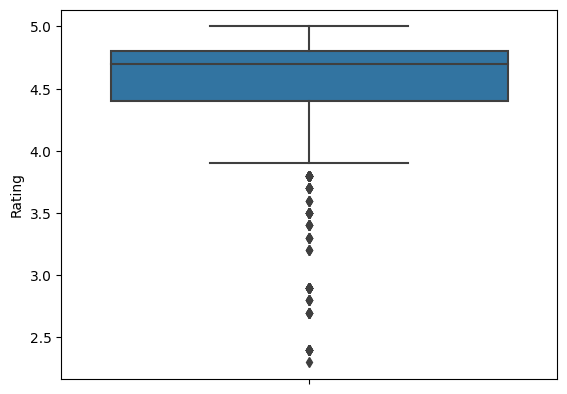

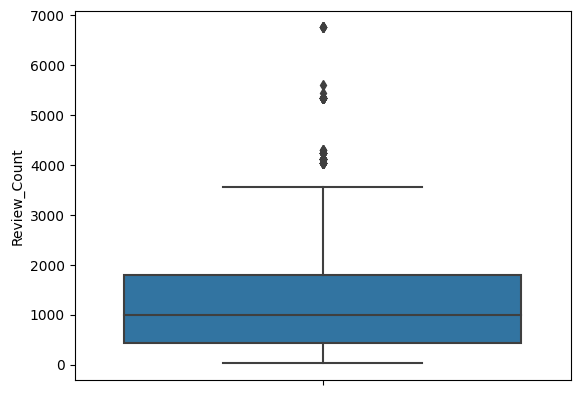

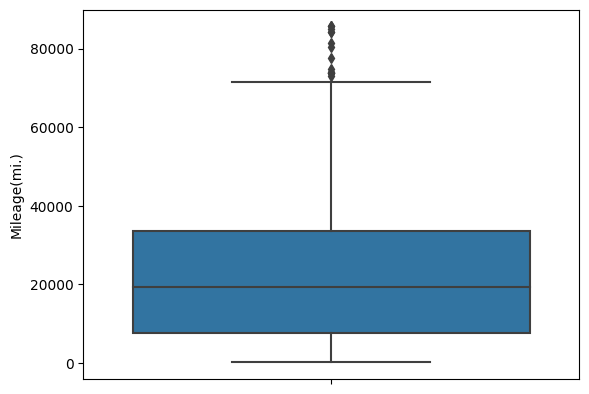

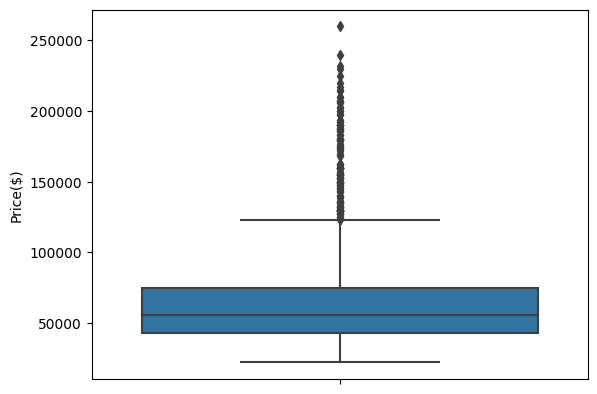

In [582]:
for i in num:
    plt.figure()
    sns.boxplot(y = i, data = df)

### Perform Outlier Analysis and remove them (also check if data loss is more than 20% then avoid Outlier analysis)

In [583]:
# missing_percentages = (df.isnull().sum() / len(df)) * 100


# if missing_percentages.mean() > 40:
#     print("Data loss is more than 40%. Avoiding outlier analysis.")
# else:
#     num = df.select_dtypes(include='number').columns 

#     original_len = len(df) 

#     for i in num:
#         q1 = df[i].quantile(0.25)
#         q3 = df[i].quantile(0.75)
#         iqr = q3 - q1
#         ul = q3 + 1.5 * iqr
#         ll = q1 - 1.5 * iqr

#         df = df[(df[i] <= ul) & (df[i] >= ll)]

#     data_loss = (original_len - len(df)) / original_len * 100
#     print("Data loss percentage:", data_loss)


In [584]:
# for i in num:
#     q1 = df[i].quantile(0.25)
#     q3 = df[i].quantile(0.75)
#     iqr = q3 - q1
#     ul = q3 + 1.5*iqr
#     ll = q1 - 1.5*iqr

#     df = df[(df[i] <= ul) & (df[i] >= ll)]

In [585]:
df

,Name,Dealer_Name,Rating,Review_Count,Year,Mileage(mi.),Price($)
0,2022 Mercedes-Benz EQB 350 Base 4MATIC,Mercedes-Benz of Foothill Ranch,4.7,668,2022,4930.0,47999.0
1,2022 Mercedes-Benz AMG G 63 4MATIC,Benzel-Busch Motor Car,4.5,5334,2022,8095.0,206551.0
2,2023 Mercedes-Benz AMG GLE 53 Base,D-Patrick Motoplex,4.7,373,2023,1056.0,94595.0
3,2022 Mercedes-Benz AMG GLB 35 Base,Mercedes-Benz of Chantilly,4.7,976,2022,22815.0,48500.0
4,2020 Mercedes-Benz GLC 350e Base 4MATIC,Fletcher Jones Motorcars of Fremont,4.7,1221,2020,35012.0,37981.0
...,...,...,...,...,...,...,...
2025,2022 Mercedes-Benz S-Class S 580 4MATIC,Autohaus on Edens,4.7,2494,2022,9503.0,98324.0
2026,2019 Mercedes-Benz E-Class E 300,Morrie's Mercedes Benz of St. Paul,4.8,278,2019,53815.0,35999.0
2028,2021 Mercedes-Benz GLS 450 4MATIC,Mercedes-Benz of Catonsville,4.3,494,2021,30259.0,68000.0
2029,2019 Mercedes-Benz E-Class E 300 4MATIC,Mercedes-Benz of Arcadia,4.8,1229,2019,49951.0,35995.0


In [586]:
df["Dealer_Name"].value_counts()

Dealer_Name
Mercedes-Benz of Hoffman Estates    68
Mercedes-Benz Of Tampa              51
RBM of Atlanta                      40
Mercedes-Benz of Lynnwood           35
Mercedes-Benz of Chicago            32
                                    ..
Mercedes-Benz of Long Beach          1
Coppus Motors                        1
Mercedes-Benz of Boston              1
Mercedes-Benz of Hilton Head         1
Mercedes-Benz of Marietta            1
Name: count, Length: 212, dtype: int64

### Scaling

In [587]:
# sc = StandardScaler()


# num = df.select_dtypes(include='number').drop('Price($)', axis=1).columns


# df[num] = sc.fit_transform(df[num])

In [588]:
num = ['Review_Count',"Mileage(mi.)"]

In [589]:
sc = StandardScaler()

In [590]:
df[num] = sc.fit_transform(df[num])

In [591]:
df[num] 

,Review_Count,Mileage(mi.)
0,-0.526979,-1.021725
1,3.356489,-0.833119
2,-0.772504,-1.252581
3,-0.270633,0.044062
4,-0.066722,0.770895
...,...,...
2025,0.992784,-0.749215
2026,-0.851572,1.891387
2028,-0.671797,0.487659
2029,-0.060064,1.661127


### One Hot Encoding

In [592]:
le = LabelEncoder()

In [593]:
df['Year'] = df['Year'].astype('category')


In [594]:
df = pd.get_dummies(df, columns=['Year'],drop_first=True)

In [628]:
df.drop(["Name","Dealer_Name"],axis=1,inplace=True)

In [611]:
df

,Rating,Review_Count,Mileage(mi.),Price($),Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023
0,4.7,-0.526979,-1.021725,47999.0,False,False,False,False,False,False,False,True,False
1,4.5,3.356489,-0.833119,206551.0,False,False,False,False,False,False,False,True,False
2,4.7,-0.772504,-1.252581,94595.0,False,False,False,False,False,False,False,False,True
3,4.7,-0.270633,0.044062,48500.0,False,False,False,False,False,False,False,True,False
4,4.7,-0.066722,0.770895,37981.0,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,4.7,0.992784,-0.749215,98324.0,False,False,False,False,False,False,False,True,False
2026,4.8,-0.851572,1.891387,35999.0,False,False,False,False,True,False,False,False,False
2028,4.3,-0.671797,0.487659,68000.0,False,False,False,False,False,False,True,False,False
2029,4.8,-0.060064,1.661127,35995.0,False,False,False,False,True,False,False,False,False


In [612]:
X = df.drop('Price($)', axis = 1)

In [613]:
y= df['Price($)']

In [618]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [619]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# models = {'Linear Regression': LinearRegression(),
#           'Decision Tree Regression': DecisionTreeRegressor(random_state=15),
#           'Random Forest Regression': RandomForestRegressor(random_state=15)}

# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Print evaluation metrics
#     print(name + ":")
#     print("RMSE:", rmse)
#     print("MAE:", mae)
#     print("R^2 Score:", r2)
#     print("")

#     # Plot actual vs predicted prices
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_test, y_pred)
#     plt.xlabel('Actual Price')
#     plt.ylabel('Predicted Price')
#     plt.title(name + ' - Actual vs Predicted Prices')
#     plt.show()

In [620]:
lr= LinearRegression()

In [621]:
lr.fit(x_train, y_train)

LinearRegression()

In [623]:
y_pred = lr.predict(x_test)

In [624]:
y_pred

array([54836.53606283, 82356.56993064, 75378.15786078, 70533.55844893,
       54472.26127731, 65081.76783781, 75531.5110417 , 56512.62160828,
       54863.58640067, 42536.19299423, 76748.82580626, 66156.95286115,
       59808.24717401, 55167.18333091, 49865.024132  , 72870.7395405 ,
       47111.82003958, 74609.66959012, 74375.78641474, 74399.68706638,
       72220.42882197, 76234.51279333, 80381.40888266, 72137.77533748,
       77993.54674371, 79911.08693188, 78666.11300594, 57621.30998976,
       49527.33491401, 58252.00629266, 85169.67946792, 64852.80260294,
       79514.88135727, 55833.02968522, 79434.46658182, 72352.99215747,
       72632.55458835, 71740.50976226, 66959.33044225, 58820.49373237,
       77040.02510292, 67400.80723923, 56960.71057014, 79668.82705406,
       57993.85183103, 81637.68308215, 58752.11142503, 79612.89848767,
       56414.51423318, 51466.85588565, 64031.2793085 , 70248.51389166,
       75226.89954389, 77538.10608835, 52721.6622171 , 56753.4161717 ,
      

In [627]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)

Linear Regression
Mean Squared Error: 893178148.8088485
Mean Absolute Error: 21887.835332060025
R^2 Score: 0.14331575298618127
